# Exploratory analisis

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

In [5]:
CSV_FILE_NAME = 'processed.csv'
TARGET = 'BP'

In [6]:
df = pd.read_csv(CSV_FILE_NAME, low_memory=False)

In [74]:
POSITIONS = list(set(df[TARGET]))

In [8]:
# ---------------------------color map------------------------ #
cmap = plt.get_cmap('Accent')
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

In [67]:
COLOR_BY_BP = {
    "RW":  "#067BC2" , 
    "LM":  "#84BCDA", 
    "RWB": "#ecc30b", 
    "RB":  "#f37748" , 
    "CB":  "#AA4465",
    
    "LB":  "#320E3B", 
    "CDM": "#4C2A85", 
    "CAM": "#36B7FD", 
    "LWB": "#BCEDF6", 
    "CF":  "#FFD3E8", 
    
    "LW": "#6C809A",
    "GK": "#9CFC97", 
    "ST": "#6BA368", 
    "RM": "#515B3A", 
    "CM": "#353D2F"
}

RGBA_COLOR_BY_BP = {}
for (bp, color) in COLOR_BY_BP.items():
    RGBA_COLOR_BY_BP[bp] = mcolors.to_rgba(color) 
    
def color_labels(labels):
    return [RGBA_COLOR_BY_BP[x] for x in labels]

### Dataset Info

In [68]:
print(f"* Column count: {len(df.columns)}")
print(f"* Rows   count: {len(df)}")
print(f"* Nulls  count: {df['BP'].isnull().sum()}")
print(f"* Column types: {set(df.dtypes)}")

* Column count: 66
* Rows   count: 17125
* Nulls  count: 0
* Column types: {dtype('O'), dtype('float64'), dtype('int64')}


### Class distribution

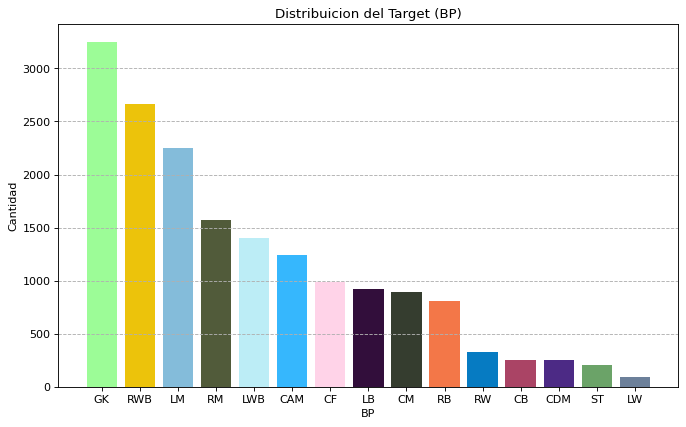

In [206]:
best_positions_count = df[TARGET].value_counts()

bar_heights = (best_positions_count.values).T.flatten()
plt.figure(figsize=(10,6), dpi=80)
plt.grid(axis='y', linestyle='--')

plt.bar(x=POSITIONS, height=bar_heights, width=0.8, color=color_labels(POSITIONS))
plt.title("Distribuicion del Target (BP)")
plt.xlabel("BP")
plt.ylabel("Cantidad")
plt.show()

### Height and weight average by position

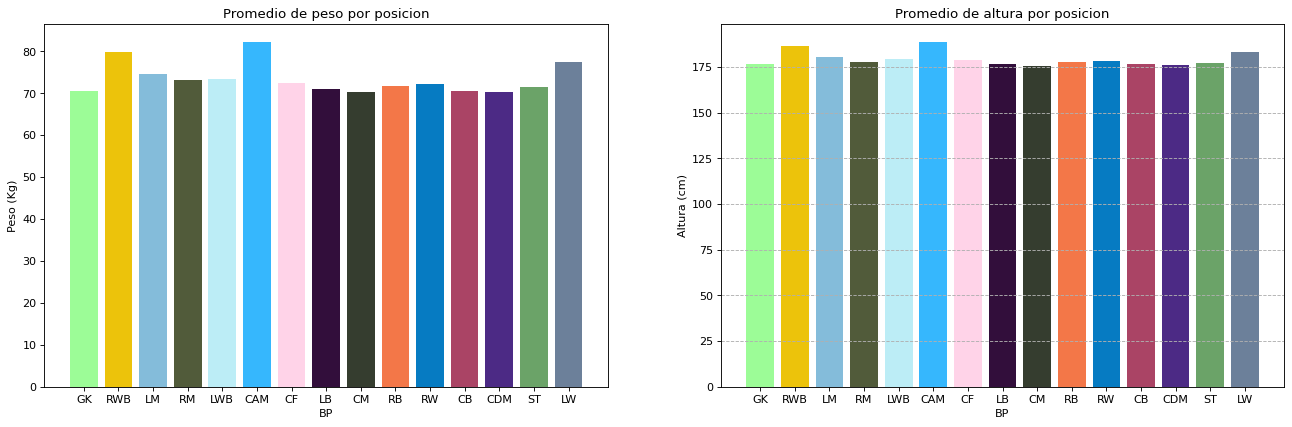

In [211]:
height_avg_by_bp = df[[TARGET, 'Height']].groupby(TARGET).mean()
weight_avg_by_bp = df[[TARGET, 'Weight']].groupby(TARGET).mean()

weights_bar_heights = (weight_avg_by_bp.values).T.flatten()
heights_bar_heights = (height_avg_by_bp.values).T.flatten()

fig, axs = plt.subplots(ncols=2, figsize=(20,6), dpi=80)

plt.grid(axis='y', linestyle='--')

axs[0].bar(x=POSITIONS, height=weights_bar_heights, width=0.8, color=color_labels(labels))
axs[1].bar(x=POSITIONS, height=heights_bar_heights, width=0.8, color=color_labels(labels))

axs[0].set_title("Promedio de peso por posicion")
axs[1].set_title("Promedio de altura por posicion")

axs[0].set_xlabel("BP")
axs[1].set_xlabel("BP")

axs[0].set_ylabel("Peso (Kg)")
axs[1].set_ylabel("Altura (cm)")

plt.show()

### Players capacities heatmap

Player attributes - All players have the following attributes on their FUT cards, apart from goalkeepers: 

* Defending (DEF) - A player’s all-round defensive abilities, including tackling, heading and positioning. 
* Dribbling (DRI) - A player’s dribbling ability. 
* Pace (PAC) - The speed of a player. 
* Passing (PAS) - A player’s passing ability. 
* Physical (PHY) - A player’s overall physical attributes, including their strength. 
* Shooting (SHO)- The player’s shooting ability. 


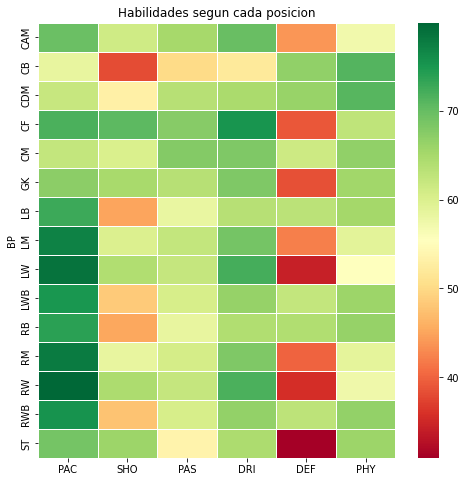

In [217]:
# Nos vamos a centrar en los 6 primeros, que estan relacionados a medidas cuantitativas del jugadro
capacities = ["PAC", "SHO", "PAS", "DRI", "DEF", "PHY"]

# agrupamos y sacamos el promedio por cada una de las posiciones.
# el promedio se redondea a 2 decimales
capacities_mean = df[properties + [TARGET]].groupby(TARGET).agg(lambda x: round(x.mean(),2));
data = np.array(props_avg)

plt.figure(figsize=(8,8))
sns.heatmap(capacities_mean, cmap='RdYlGn', linewidths=0.5)
plt.title("Habilidades segun cada posicion")
plt.show()

### Players attributes heatmap

* Attacking -> sum of features: Crossing, Finishing, Heading Accuracy, Short Passing, Volleys
* Skill -> sum of feratures: Dribbling Curve,FK Accuracy,Long Passing, Ball Control
* Mentality  -> sum of features: Aggression, Interceptions , Positioning ,Vision, Penalties, Composure
* Movement -> sum of features: Acceleration, Sprint Speed,Agility,Reactions, Balance
* Power -> Shot Power, Jumping, Stamina, Strength, Long Shots
* Defending -> Defensive Awareness, Standing Tackle, liding Tackle
* Goalkeeping -> GK Diving, GK Handling, GK Kicking, GK Positioning, GK Reflexes

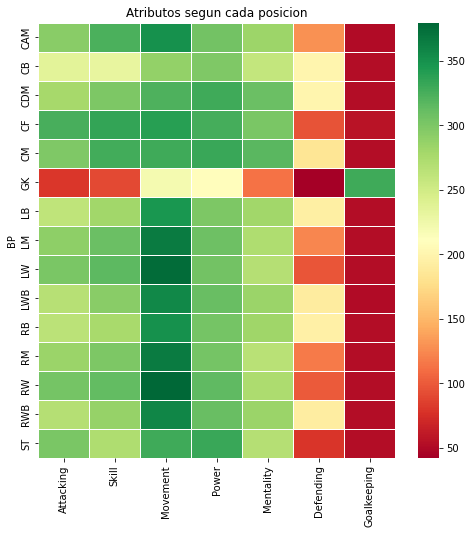

In [218]:
attributes = ["Attacking", "Skill", "Movement", "Power", "Mentality", "Defending", "Goalkeeping"]

# agrupamos y sacamos el promedio por cada una de las posiciones.
# el promedio se redondea a 2 decimales
attributes_mean = df[attributes + [TARGET]].groupby(TARGET).agg(lambda x: round(x.mean(),2));
data = np.array(props_avg)

plt.figure(figsize=(8,8))
sns.heatmap(attributes_mean, cmap='RdYlGn', linewidths=0.5)
plt.title("Atributos segun cada posicion")
plt.show()

### Skillful foot distribution by position

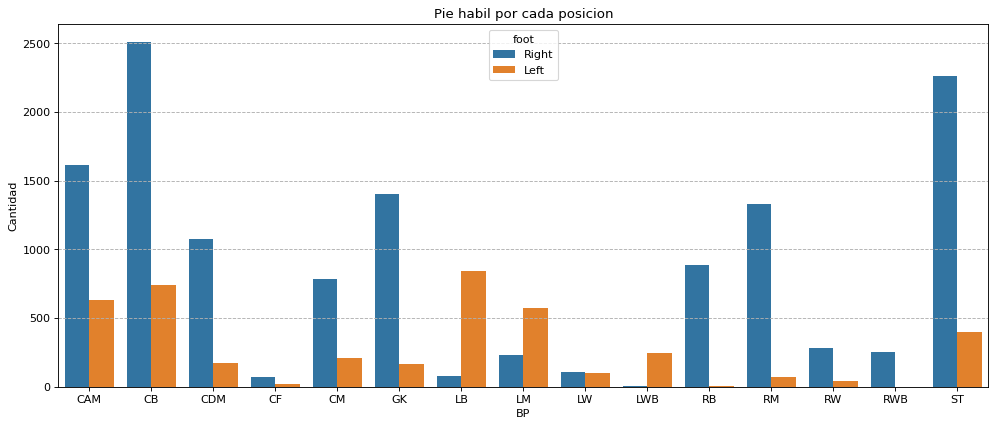

In [219]:
skillfull_foots_per_position = df[[TARGET, "foot"]].groupby(TARGET).value_counts()
aux_df = pd.DataFrame(skillfull_foots_per_position).reset_index()
aux_df.columns = ["BP", "foot", "count"]

plt.figure(figsize=(15,6), dpi=80)
plt.grid(axis='y', linestyle='--')

sns.barplot(x=TARGET, y="count", hue="foot", data=aux_df)
plt.title("Pie habil por cada posicion")
plt.xlabel("BP")
plt.ylabel("Cantidad")
plt.show()